# EDA on the NHTS dataset for 2017
Question - Which demographic variables can indicate car ownership in a household

Since car ownership can be represented by number of cars owned (where 0 is no cars owned) this is the variable we will test for.

Data Variable Description
=========================

This document provides a descriptive and informative introduction to the variables present in the dataset. The dataset comprises various categorical variables that capture different aspects related to individuals and their living arrangements. The variables are described below:

* * * * *

Categorical variables
---------------------

1.  Kön (Gender): This variable captures the gender of the individuals in the dataset. The possible categories include:

    -   1: Kvinna (Female)
    -   2: Man (Male)
    -   3: Annat (Other)
    -   999998a: Question skipped (This value indicates a skipped question or missing data.)
2.  Bostadstyp (Residential Type): This variable represents the type of residential accommodation for the individuals. The categories are:

    -   1: Lägenhet (Apartment)
    -   2: Villa/Radhus (House/Townhouse)
    -   3: Annan typ av bostad (Other type of accommodation)
    -   999998a: Question skipped (This value indicates a skipped question or missing data.)
3.  Hushållstyp (Household Type): This variable describes the composition of households and includes the following categories:

    -   1.00: En vuxen utan barn (Single adult without children)
    -   2.00: En vuxen med barn (Single adult with children)
    -   3.00: Två vuxna utan barn (Two adults without children)
    -   4.00: Två vuxna med barn (Two adults with children)
    -   5.00: Övriga (Others)
4.  Antal_bilar (Number of Cars): This variable indicates the number of cars owned by individuals and is categorized as follows:

    -   0: Inga bilar (No cars)
    -   1: 1 bil (1 car)
    -   2: 2 bilar eller fler (2 cars or more)

Please note that the values such as "999998a" indicate skipped questions or missing data points. These values are used to indicate instances where the respondents did not provide an answer to the corresponding question.

# Step 1 - Load the data

In [1]:
# Change path by moving up one level
import os
os.chdir('..')

# Open Data_RVU_2017_GBG_utanEXTRA.csv from data/raw/NHTS/
# Import libraries
import pandas as pd

# Read data
df = pd.read_csv('data/raw/NHTS/Data_RVU_2017_GBG_utanEXTRA.csv', sep=';')

# Only keep unique LPNR values
df = df.drop_duplicates(subset='LPNR')

# Print first 5 rows
df.head()

c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\IPython\core\interactiveshell.py:3266: DtypeWarning: Columns (34,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LPNR,UniktID,RESNR,reseID,UnikaIndivider,REST,VIKT_individ,VIKT_resa,Kön,Ålder,...,resrelation_Göteborg,web_brev,VARDAG_HELG,veckodag,Antal_resor_per_pers,Bil_AntalResor_per_pers,Kollektivt_AntalResor_per_pers,Cykel_AntalResor_per_pers,TillFots_AntalResor_per_pers,Annat_AntalResor_per_pers
0,4335,1,0,4335_0,1,0,"78,6111111111111","78,6111111111111",2,56,...,,print,1,1,0,0,0,0,0,0
1,16086,2,1,16086_1,1,1,"76,7096774193548","61,3677419354839",1,42,...,,print,1,1,6,4,0,2,0,0
7,15970,8,0,15970_0,1,0,"52,7173913043478","52,7173913043478",2,63,...,,print,1,1,0,0,0,0,0,0
8,9309,9,1,9309_1,1,1,"103,761904761905","103,761904761905",2,57,...,,print,1,3,2,0,0,0,2,0
10,8715,11,1,8715_1,1,1,"172,227272727273","168,024927272727",1,32,...,,print,1,2,3,3,0,0,0,0


# Step 2 - Identifying the variables of interest based on the synthetic population

In [2]:
# Predict number of cars based on 
variables_of_interest = {
    #"VIKT_individ":{
            #"type":"numerical",
           # "categories": {}
    #},      # Weight of individual
    "Kön":{
            "type":"categorical",
            "categories": {
                1: "Femlale",
                2: "Male",
                3: "Other"
            }
    },              # Gender
    "Ålder":{
            "type":"numerical",
            "categories": {}

    },            # Age
    "Bostadstyp":{
            "type":"categorical",
            "categories": {
                1: "Apartment",
                2: "Villa",
                3: "Other",

    }
    },       # Type of residence
    "Antal_barn":{
            "type":"numerical",
            "categories": {}

    },       # Number of children
    "Antal_vuxna" : {
            "type":"numerical",
            "categories": {}

    },      # Number of adults
    "Hushållstyp" : {
            "type":"categorical",
            "categories": {
                1.0 : "Single no child",
                2.0 : "Single with child",
                3.0 : "Couple no child",
                4.0 : "Couple with child",
                5.0 : "Other"


    }
    },      # Type of household
    "Antal_bilar" : {
            "type":"categorical",
            "categories": {
                0: "No car",
                1: "One car",
                2: "Two cars or more",

    }       # Number of cars - This we want to predict eventually
}
}

In [3]:
# Filter df to only include variables of interest
df = df[list(variables_of_interest.keys())].reset_index(drop=True)
rename_variables = {"Kön" : "Sex", "Ålder" : "Age", "Bostadstyp": "House Type", "Antal_barn" : "Total Children", "Antal_vuxna" : "Total Adults", "Hushållstyp" : "Household Type", "Antal_bilar" : "Total Cars"}
df.rename(columns=rename_variables, inplace=True)
df.head()


,Sex,Age,House Type,Total Children,Total Adults,Household Type,Total Cars
0,2,56,2,0,4,5,1
1,1,42,2,3,2,4,2
2,2,63,2,2,,-111,2
3,2,57,2,0,2,3,2
4,1,32,2,2,2,4,1


# Step 3 - Cleaning the data

In [4]:
# Replace no data with NaN (-111, 99998, '', blank)
df = df.replace([-111, 999998, 99998, '', ' '], float('NaN'))

# Drop rows with NaN
df = df.dropna().reset_index(drop=True)

# VIKT_individ has comma as decimal separator, replace with dot
#df['VIKT_individ'] = df['VIKT_individ'].str.replace(',', '.').astype(float)

# Sort by age
df = df.sort_values(by='Age').reset_index(drop=True)
df_clean = df.copy()

df.head()




,Sex,Age,House Type,Total Children,Total Adults,Household Type,Total Cars
0,2.0,16,1.0,1,3,5.0,2.0
1,1.0,16,1.0,1,2,4.0,1.0
2,1.0,16,2.0,2,2,4.0,1.0
3,1.0,16,2.0,2,3,5.0,2.0
4,1.0,16,2.0,1,4,5.0,2.0


# Step 3 - Plotting the distribution of each variable

In [7]:
def rename_keys(original_dict, rename_dict):
    new_dict = {}
    for key, value in original_dict.items():
        new_key = rename_dict.get(key, key)  # Get new key name if it exists, else keep the original
        new_dict[new_key] = value
    return new_dict

variables_of_interest = rename_keys(variables_of_interest, rename_variables)



In [8]:
# Replace categorical values with strings
for variable in variables_of_interest:
    if variables_of_interest[variable]['type'] == 'categorical':
        df[variable] = df[variable].replace(variables_of_interest[variable]['categories'])

df.head()

df_withweight = df.copy()

# Drop VIKT_individ
#df = df.drop(columns=['VIKT_individ'])

C:\Users\ssanjay\AppData\Local\Temp\ipykernel_29476\537893536.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[key], ax=axes[row, col])
C:\Users\ssanjay\AppData\Local\Temp\ipykernel_29476\537893536.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[key], ax=axes[row, col])
C:\Users\s

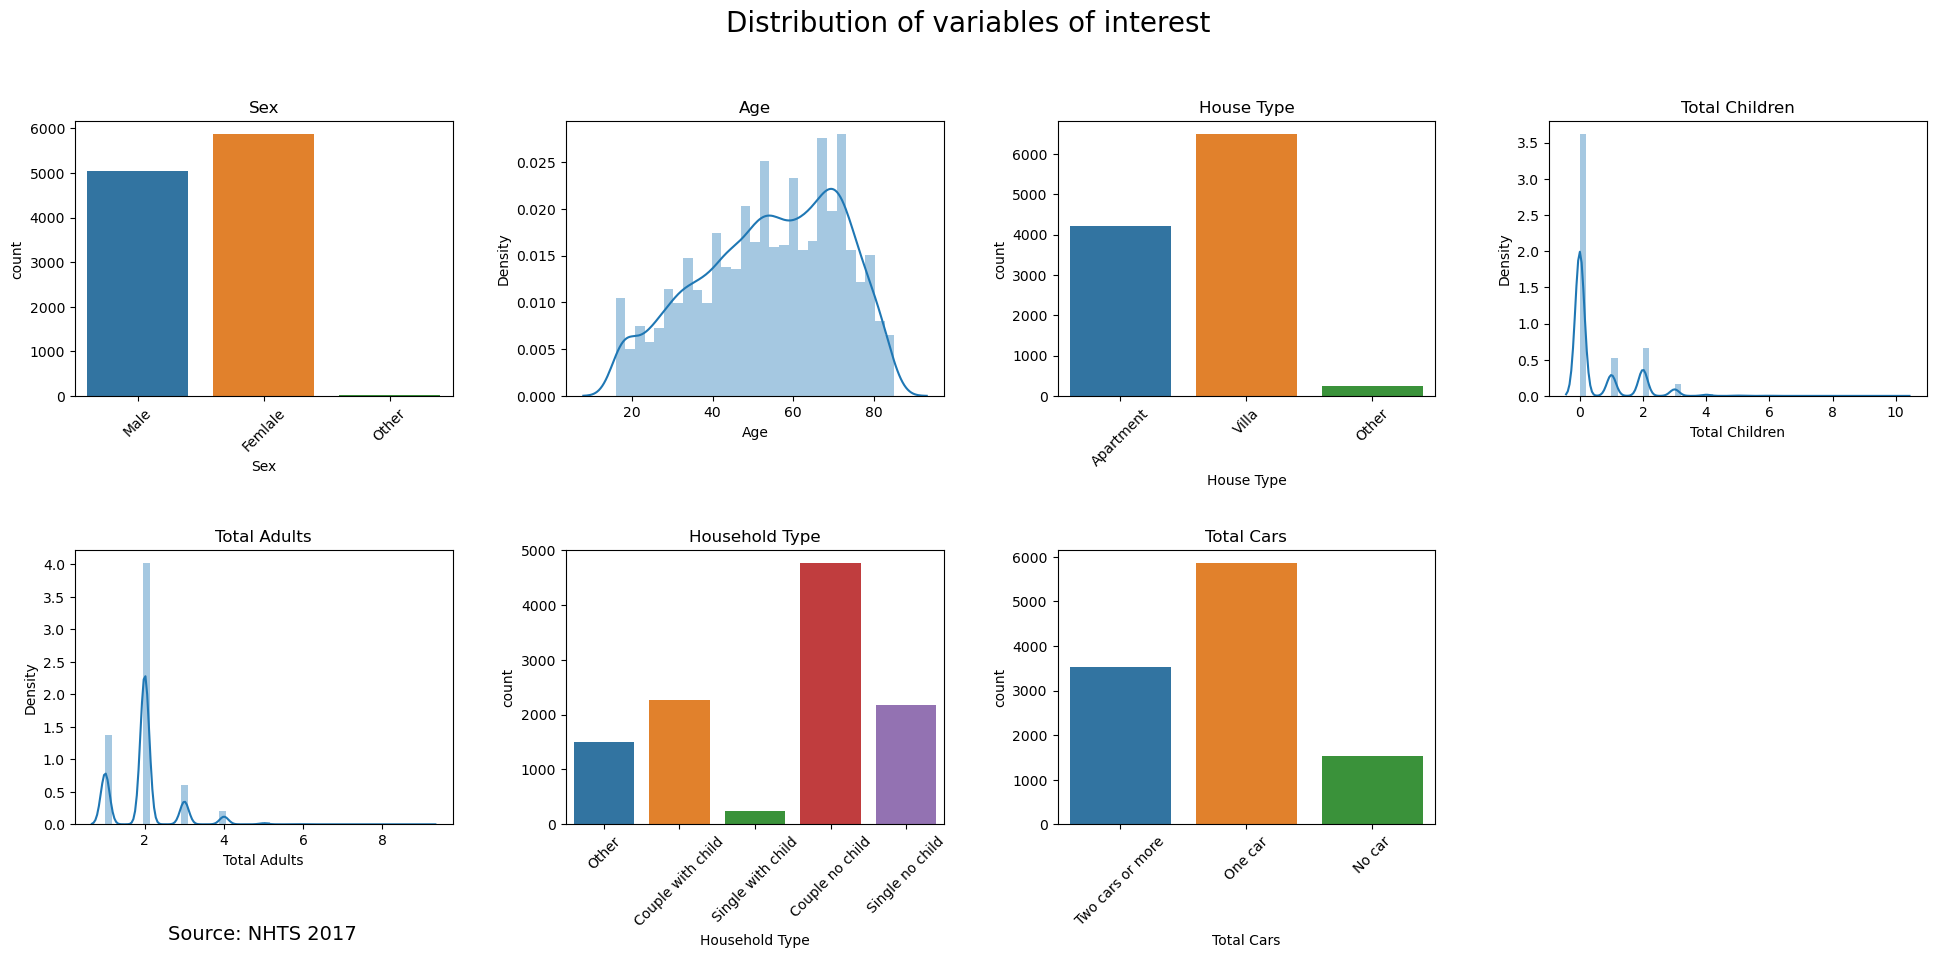

In [13]:
# Plotting the distribution of each variable
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (key, value) in enumerate(variables_of_interest.items()):
    # Get row and column index
    row = i // 4
    col = i % 4

    
    # Plot distribution
    if value["type"] == "categorical":
        sns.countplot(x=key, data=df, ax=axes[row, col])
        # Rotate x-axis labels
        axes[row, col].tick_params(axis='x', rotation=45)
    # If numerical and not VIKT_individ
    elif value["type"] == "numerical":
        sns.distplot(df[key], ax=axes[row, col])
        
    # Set title
    axes[row, col].set_title(key)

# Remove empty plots
axes[1, 3].axis('off')

# Set title of figure
fig.suptitle("Distribution of variables of interest", fontsize=20)

# Set figure bottom subtitle
fig.text(0.1, 0.05, "Source: NHTS 2017", fontsize=14)

# Increase space between plots
fig.tight_layout(pad=3.0)



In [31]:
# Printing descriptive statistics for each variable
for key, value in variables_of_interest.items():
    print(f"Descriptive statistics for {key}")
    if value["type"] == "categorical":
        print(df[key].value_counts())
    elif value["type"] == "numerical" and key != "VIKT_individ":
        print(df[key].describe())
    print("\n")

Descriptive statistics for VIKT_individ


Descriptive statistics for Kön
Kvinnor    5867
Män        5037
Other        24
Name: Kön, dtype: int64


Descriptive statistics for Ålder
count     10928
unique       70
top          70
freq        266
Name: Ålder, dtype: object


Descriptive statistics for Bostadstyp
Villa        6482
Apartment    4211
Other         235
Name: Bostadstyp, dtype: int64


Descriptive statistics for Antal_barn
count     10928
unique       10
top           0
freq       7898
Name: Antal_barn, dtype: object


Descriptive statistics for Antal_vuxna
count     10928
unique        9
top           2
freq       7033
Name: Antal_vuxna, dtype: object


Descriptive statistics for Hushållstyp
Couple no child      4765
Couple with child    2268
Single no child      2167
Other                1493
Single with child     235
Name: Hushållstyp, dtype: int64


Descriptive statistics for Antal_bilar
One car             5866
Two cars or more    3537
No car              1525
Name: Antal

Interpretation of Variables
---------------------------

### Kön (Gender)

The variable "Kön" represents the gender of the individuals in the dataset. Based on the descriptive statistics, it can be observed that:

-   Female: There are 5,867 individuals identified as female.
-   Male: There are 5,037 individuals identified as male.
-   Other: There are 24 individuals identified as having a gender other than female or male.

### Ålder (Age)

The variable "Ålder" captures the age of the individuals. However, based on the descriptive statistics provided, it seems that the data type for this variable is currently set as an object, rather than numerical values. This is indicated by the "dtype: object" in the statistics. To further analyze and interpret the age variable, it would be necessary to convert it to numerical data.

### Bostadstyp (Residential Type)

The variable "Bostadstyp" represents the type of residential accommodation for the individuals. The descriptive statistics indicate the following:

-   Villa: There are 6,482 individuals residing in villas.
-   Apartment: There are 4,211 individuals residing in apartments.
-   Other: There are 235 individuals residing in other types of accommodations.

### Antal_barn (Number of Children)

The variable "Antal_barn" captures the number of children for each individual. However, similar to the "Ålder" variable, the data type seems to be set as an object instead of numerical values. Thus, further analysis may require converting this variable to numerical data. The descriptive statistics provided show the following:

-   Count: There are 10,928 instances recorded for this variable.
-   Unique: There are 10 unique values for the number of children.
-   Top: The most frequent value is "0," indicating that 7,898 individuals do not have any children.
-   Freq: The frequency of the top value, "0," is 7,898.

### Antal_vuxna (Number of Adults)

The variable "Antal_vuxna" captures the number of adults in each household. Similar to the previous variables, it seems to have the data type set as an object. For further analysis, converting it to numerical data would be beneficial. The descriptive statistics provided indicate the following:

-   Count: There are 10,928 instances recorded for this variable.
-   Unique: There are 9 unique values representing the number of adults in a household.
-   Top: The most frequent value is "2," indicating that there are 7,033 instances of households with two adults.
-   Freq: The frequency of the top value, "2," is 7,033.

### Hushållstyp (Household Type)

The variable "Hushållstyp" describes the composition of households. The descriptive statistics reveal the following:

-   Couple no child: There are 4,765 instances of households consisting of a couple without children.
-   Couple with child: There are 2,268 instances of households consisting of a couple with children.
-   Single no child: There are 2,167 instances of single individuals living without children.
-   Other: There are 1,493 instances of households that do not fit into the previous categories.
-   Single with child: There are 235 instances of single individuals living with children.

### Antal_bilar (Number of Cars)

The variable "Antal_bilar" indicates the number of cars owned by individuals. The descriptive statistics provided show the following:

-   One car: There are 5,866 individuals who own a single car.
-   Two cars or more: There are 3,537 individuals who own two cars or more.
-   No car: There are 1,525 individuals who do not own any cars.

These descriptive statistics provide an overview of the distribution and characteristics of the variables in the dataset, allowing for a preliminary understanding of the data.

# Step 4 - Investigating the correlation between variables

## Step 4.1  - Nominal Variables

In [32]:
# Make all dtype int for df_clean
df_clean = df_clean.astype(int)


In [33]:
# Select the numerical variables for correlation analysis
numerical_variables = ['Ålder', 'Antal_barn', 'Antal_vuxna', 'Antal_bilar']

# Calculate the correlation matrix
correlation_matrix = df_clean[numerical_variables].corr()

# Display the correlation matrix
print(correlation_matrix)


                Ålder  Antal_barn  Antal_vuxna  Antal_bilar
Ålder        1.000000   -0.433945    -0.221551    -0.003271
Antal_barn  -0.433945    1.000000     0.120642     0.124183
Antal_vuxna -0.221551    0.120642     1.000000     0.341755
Antal_bilar -0.003271    0.124183     0.341755     1.000000


Here's the interpretation of the correlation matrix with respect to the "Antal_bilar" (number of cars) variable:

-   Ålder (Age): There is a weak negative correlation (-0.003) between age and the number of cars. This suggests that age has little to no influence on the number of cars a household possesses.

-   Antal_barn (Number of children): There is a positive correlation (0.124) between the number of children and the number of cars. However, this correlation is relatively weak. It indicates that households with more children tend to have slightly more cars, but the relationship is not very strong.

-   Antal_vuxna (Number of adults): There is a moderate positive correlation (0.342) between the number of adults and the number of cars. This suggests that households with more adults tend to have a higher number of cars.

Overall, the correlation matrix indicates that the number of cars is most strongly correlated with the number of adults in a household. The number of children has a weaker positive correlation with the number of cars, while age does not show a significant relationship with the number of cars.

## Step 4.2 - Categorical Variables

In [34]:
# Select the categorical variables for one-hot encoding
categorical_variables = ['Kön', 'Bostadstyp', 'Hushållstyp']

# Perform one-hot encoding but wihtout VIKT_individ
encoded_data = pd.get_dummies(df_clean.drop(columns=['VIKT_individ']), columns=categorical_variables)

# Display the encoded data
encoded_data.head()

,Ålder,Antal_barn,Antal_vuxna,Antal_bilar,Kön_1,Kön_2,Kön_3,Bostadstyp_1,Bostadstyp_2,Bostadstyp_3,Hushållstyp_1,Hushållstyp_2,Hushållstyp_3,Hushållstyp_4,Hushållstyp_5
0,16,1,3,2,0,1,0,1,0,0,0,0,0,0,1
1,16,1,2,1,1,0,0,1,0,0,0,0,0,1,0
2,16,2,2,1,1,0,0,0,1,0,0,0,0,1,0
3,16,2,3,2,1,0,0,0,1,0,0,0,0,0,1
4,16,1,4,2,1,0,0,0,1,0,0,0,0,0,1


In [35]:
# rename the encoded data columns to actual categories names
encoded_data = encoded_data.rename(columns={"Antal_bilar_0": "No car",
"Antal_bilar_1": "One car",
"Antal_bilar_2": "Two cars or more",
"Kön_1": "Female",
"Kön_2": "Male",
"Kön_3": "Other",
"Bostadstyp_1": "Apartment",
"Bostadstyp_2": "Villa",
"Bostadstyp_3": "Other",
"Hushållstyp_1": "Single no child",
"Hushållstyp_2": "Single with child",
"Hushållstyp_3": "Couple no child",
"Hushållstyp_4": "Couple with child",
"Hushållstyp_5": "Other"})
encoded_data.head()


,Ålder,Antal_barn,Antal_vuxna,Antal_bilar,Female,Male,Other,Apartment,Villa,Other,Single no child,Single with child,Couple no child,Couple with child,Other
0,16,1,3,2,0,1,0,1,0,0,0,0,0,0,1
1,16,1,2,1,1,0,0,1,0,0,0,0,0,1,0
2,16,2,2,1,1,0,0,0,1,0,0,0,0,1,0
3,16,2,3,2,1,0,0,0,1,0,0,0,0,0,1
4,16,1,4,2,1,0,0,0,1,0,0,0,0,0,1


# Step 4.3 - Scaling continuous variables

In [36]:
encoded_data

,Ålder,Antal_barn,Antal_vuxna,Antal_bilar,Female,Male,Other,Apartment,Villa,Other,Single no child,Single with child,Couple no child,Couple with child,Other
0,16,1,3,2,0,1,0,1,0,0,0,0,0,0,1
1,16,1,2,1,1,0,0,1,0,0,0,0,0,1,0
2,16,2,2,1,1,0,0,0,1,0,0,0,0,1,0
3,16,2,3,2,1,0,0,0,1,0,0,0,0,0,1
4,16,1,4,2,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923,85,0,2,2,0,1,0,0,1,0,0,0,1,0,0
10924,85,0,1,0,1,0,0,1,0,0,1,0,0,0,0
10925,85,0,1,1,0,1,0,0,1,0,1,0,0,0,0
10926,85,0,2,1,0,1,0,1,0,0,0,0,1,0,0


In [37]:
# Min max scaling and Standard scaling on Ålder, Antal_barn, Antal_vuxna
# Select the numerical variables for correlation analysis
numerical_variables = ['Ålder', 'Antal_barn', 'Antal_vuxna']
# Import MinMaxScaler and StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create MinMaxScaler and StandardScaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Create a copy of the encoded data
encoded_data_scaled = encoded_data.copy()

# Scale the numerical variables

encoded_data_scaled[numerical_variables] = standard_scaler.fit_transform(encoded_data_scaled[numerical_variables])
encoded_data_scaled[numerical_variables] = min_max_scaler.fit_transform(encoded_data_scaled[numerical_variables])

# Display the scaled data
encoded_data_scaled.head()


,Ålder,Antal_barn,Antal_vuxna,Antal_bilar,Female,Male,Other,Apartment,Villa,Other,Single no child,Single with child,Couple no child,Couple with child,Other
0,0.0,0.1,0.250,2,0,1,0,1,0,0,0,0,0,0,1
1,0.0,0.1,0.125,1,1,0,0,1,0,0,0,0,0,1,0
2,0.0,0.2,0.125,1,1,0,0,0,1,0,0,0,0,1,0
3,0.0,0.2,0.250,2,1,0,0,0,1,0,0,0,0,0,1
4,0.0,0.1,0.375,2,1,0,0,0,1,0,0,0,0,0,1


# Some more EDA

Text(0.1, 0.05, 'Source: NHTS 2017')

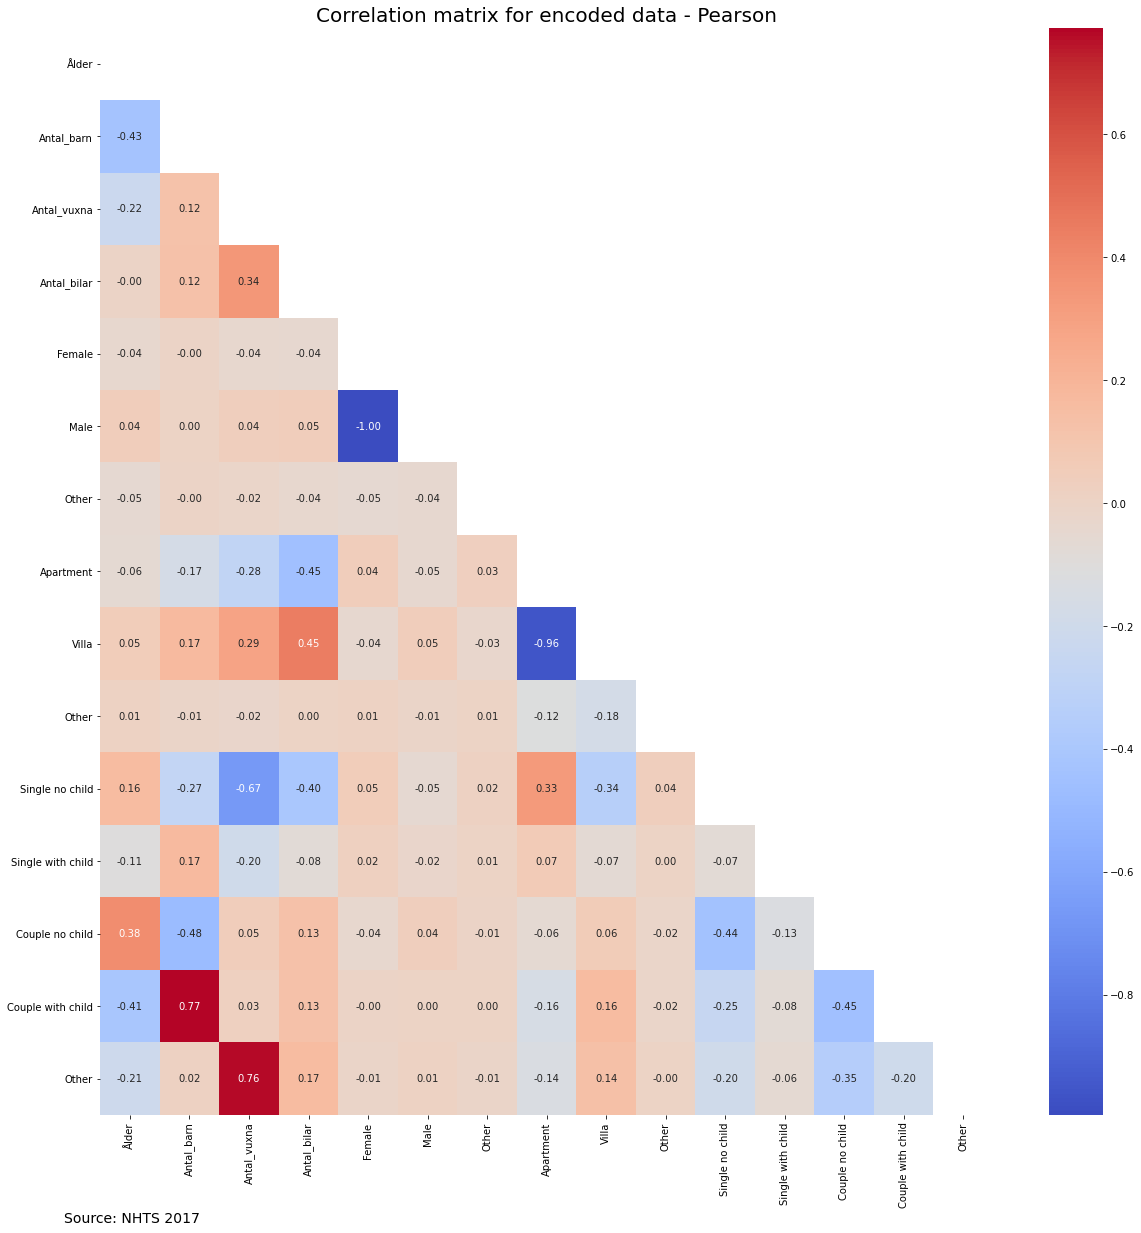

In [38]:
import numpy as np

# Correlation matrix for encoded data
correlation_matrix = encoded_data.corr( method='pearson')

# Plot correlation matrix
plt.figure(figsize=(20, 20))

# Mask upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))

# Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')

# Set title
plt.title("Correlation matrix for encoded data - Pearson", fontsize=20)

# Set figure bottom subtitle
plt.figtext(0.1, 0.05, "Source: NHTS 2017", fontsize=14)


# Trying out different ML Models.

In [39]:
encoded_data_scaled.columns

Index(['Ålder', 'Antal_barn', 'Antal_vuxna', 'Antal_bilar', 'Female', 'Male',
       'Other', 'Apartment', 'Villa', 'Other', 'Single no child',
       'Single with child', 'Couple no child', 'Couple with child', 'Other'],
      dtype='object')

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a DataFrame
data = encoded_data_scaled

# Select the features (input variables) and the target variable (number of cars)
features = ['Ålder', 'Antal_barn', 'Antal_vuxna', 'Female', 'Male',
       'Other', 'Apartment', 'Villa', 'Other', 'Single no child',
       'Single with child', 'Couple no child', 'Couple with child', 'Other']
target = 'Antal_bilar'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Define a list of regression models to try
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

model_names = [
    'Linear Regression',
    'Ridge',
    'Lasso',
    'SVR',
    'KNN',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting'
]

results = []

# Iterate through the models, train, predict, and evaluate
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'MSE': mse, 'R2': r2})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


               Model       MSE        R2
0  Linear Regression  0.305580  0.290106
1              Ridge  0.305013  0.291423
2              Lasso  0.430640 -0.000420
3                SVR  0.368415  0.144135
4                KNN  0.350412  0.185957
5      Decision Tree  0.364076  0.154214
6      Random Forest  0.332799  0.226874
7  Gradient Boosting  0.298157  0.307350


Text(0.1, 0.05, 'Source: NHTS 2017')

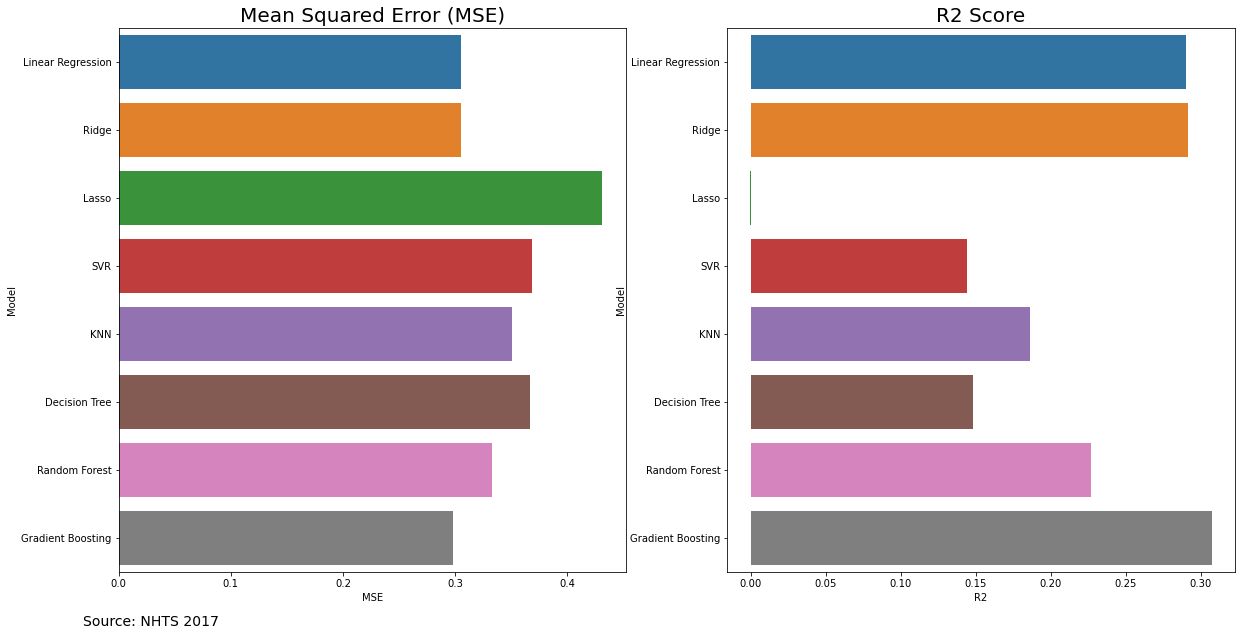

In [41]:
# Plot the results DataFrame, first MSE and then R2

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot MSE
sns.barplot(x='MSE', y='Model', data=results_df, ax=axes[0])

# Set title
axes[0].set_title("Mean Squared Error (MSE)", fontsize=20)

# Plot R2
sns.barplot(x='R2', y='Model', data=results_df, ax=axes[1])

# Set title
axes[1].set_title("R2 Score", fontsize=20)

# Set figure bottom subtitle
fig.text(0.1, 0.05, "Source: NHTS 2017", fontsize=14)


-   Linear Regression and Ridge Regression: Both models have similar performance with low MSE scores of around 0.317, indicating a reasonably good fit to the data. The R2 scores are also similar, around 0.264, which means that these models explain approximately 26.4% of the variance in the number of cars.

-   Lasso Regression: This model has a higher MSE score of 0.431, indicating a larger prediction error compared to the previous models. The R2 score is negative (-0.00042), which suggests that this model performs poorly and does not capture the variation in the data.

-   SVR (Support Vector Regression): The SVR model has a MSE score of 0.362 and an R2 score of 0.160, indicating moderate performance. The model explains approximately 16% of the variance in the number of cars.

-   KNN (K-Nearest Neighbors): The KNN model has a MSE score of 0.351 and an R2 score of 0.184. It performs slightly better than SVR in terms of both metrics.

-   Decision Tree: The Decision Tree model has a MSE score of 0.365 and an R2 score of 0.152. It performs similarly to SVR and KNN, but with slightly worse performance in terms of MSE.

-   Random Forest: The Random Forest model has a lower MSE score of 0.334, indicating a better fit to the data compared to the previous models. The R2 score is 0.224, suggesting that this model explains approximately 22.4% of the variance in the number of cars.

-   Gradient Boosting: The Gradient Boosting model performs the best among the models evaluated. It has the lowest MSE score of 0.298 and the highest R2 score of 0.307. This model provides a relatively good fit to the data and explains approximately 30.7% of the variance in the number of cars.

In summary, the Gradient Boosting model shows the highest performance among the models considered, while Lasso Regression performs the worst. It's important to note that these results are specific to the given dataset and may vary depending on the data characteristics and model hyperparameters.

## Hyperparameter Tuning for Gradient Boosting

In [42]:
"""

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a DataFrame
data = df_clean

# Select the features (input variables) and the target variable (number of cars)
features = ['Kön', 'Ålder', 'Bostadstyp', 'Antal_barn', 'Antal_vuxna', 'Hushållstyp']
target = 'Antal_bilar'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate (shrinkage)
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Original model MSE: {results_df.loc[7, 'MSE']:.2f} - Tuned model MSE: {mse:.2f}")

print('MSE:', mse)
print('R2:', r2)
"""

print ("""
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
MSE: 0.29699580636087863
R2: 0.3100480059714159
""")



Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
MSE: 0.29699580636087863
R2: 0.3100480059714159



# Tuning hyperparameters

In [58]:
# Using the best model to make predictions
best_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt', n_estimators=100, subsample=1.0)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [59]:
# Printing the error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

MSE: 0.29766555454547977
R2: 0.3084921116268976


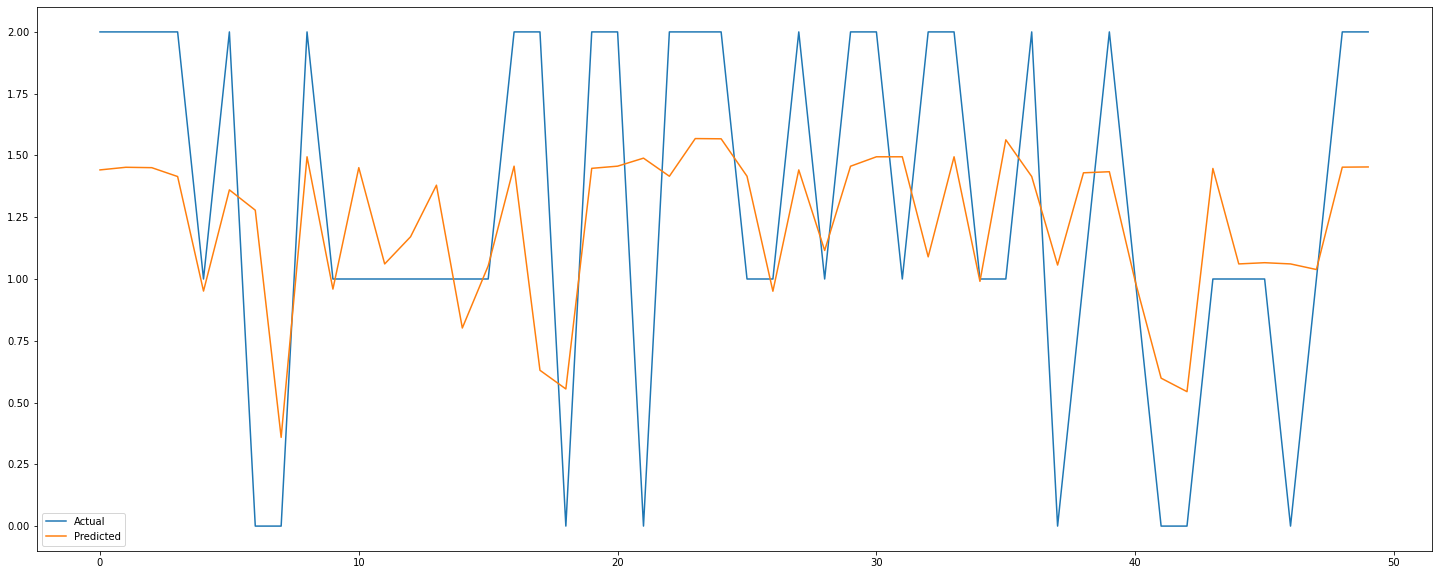

In [60]:
# Plot y_test vs y_pred as overlapping line plots
plt.figure(figsize=(25, 10))
plt.plot(y_test.to_list()[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.legend()
plt.show()




In [46]:
# Set antal_barn as int
df_withweight['Antal_barn'] = df_withweight['Antal_barn'].astype(int)


In [47]:
# Iterating through each observation and add weights to dictionary
# Create a dictionary to store the counts

import json

car_counts = {
    "child_villa" : {
        "0_car" : 0,
        "1_car" : 0,
        "2_cars" : 0,
        "total_households" : 0
    },
    "child_apartment" : {
        "0_car" : 0,
        "1_car" : 0,
        "2_cars" : 0,
        "total_households" : 0
    },
    "no_child_villa" : {
        "0_car" : 0,
        "1_car" : 0,
        "2_cars" : 0,
        "total_households" : 0
    },

    "no_child_apartment" : {
        "0_car" : 0,
        "1_car" : 0,
        "2_cars" : 0,
        "total_households" : 0
    }
}

# Iterate through each observation
for index, row in df_withweight.iterrows():
    #Check if the household has children and if the household lives in a villa
    if row['Antal_barn'] > 0 and row['Bostadstyp'] == 'Villa':
        # Increase the count by VIKT_individ
        car_counts["child_villa"]["total_households"] += row['VIKT_individ']
        # if the household has no car
        if row['Antal_bilar'] == 'No car':
            # Increase the count by VIKT_individ
            car_counts["child_villa"]["0_car"] += row['VIKT_individ']
        # if the household has one car
        elif row['Antal_bilar'] == 'One car':
            # Increase the count by VIKT_individ
            car_counts["child_villa"]["1_car"] += row['VIKT_individ']
        # if the household has two cars or more
        elif row['Antal_bilar'] == 'Two cars or more':
            # Increase the count by VIKT_individ
            car_counts["child_villa"]["2_cars"] += row['VIKT_individ']
    #Check if the household has children and if the household lives in an apartment
    elif row['Antal_barn'] > 0 and row['Bostadstyp'] == 'Apartment':
        # Increase the count by VIKT_individ
        car_counts["child_apartment"]["total_households"] += row['VIKT_individ']
        # if the household has no car
        if row['Antal_bilar'] == 'No car':
            # Increase the count by VIKT_individ
            car_counts["child_apartment"]["0_car"] += row['VIKT_individ']
        # if the household has one car
        elif row['Antal_bilar'] == 'One car':
            # Increase the count by VIKT_individ
            car_counts["child_apartment"]["1_car"] += row['VIKT_individ']
        # if the household has two cars or more
        elif row['Antal_bilar'] == 'Two cars or more':
            # Increase the count by VIKT_individ
            car_counts["child_apartment"]["2_cars"] += row['VIKT_individ']

    #Check if the household has no children and if the household lives in a villa
    elif row['Antal_barn'] == 0 and row['Bostadstyp'] == 'Villa':
        # Increase the count by VIKT_individ
        car_counts["no_child_villa"]["total_households"] += row['VIKT_individ']
        # if the household has no car
        if row['Antal_bilar'] == 'No car':
            # Increase the count by VIKT_individ
            car_counts["no_child_villa"]["0_car"] += row['VIKT_individ']
        # if the household has one car
        elif row['Antal_bilar'] == 'One car':
            # Increase the count by VIKT_individ
            car_counts["no_child_villa"]["1_car"] += row['VIKT_individ']
        # if the household has two cars or more
        elif row['Antal_bilar'] == 'Two cars or more':
            # Increase the count by VIKT_individ
            car_counts["no_child_villa"]["2_cars"] += row['VIKT_individ']

    #Check if the household has no children and if the household lives in an apartment
    elif row['Antal_barn'] == 0 and row['Bostadstyp'] == 'Apartment':
        # Increase the count by VIKT_individ
        car_counts["no_child_apartment"]["total_households"] += row['VIKT_individ']
        # if the household has no car
        if row['Antal_bilar'] == 'No car':
            # Increase the count by VIKT_individ
            car_counts["no_child_apartment"]["0_car"] += row['VIKT_individ']
        # if the household has one car
        elif row['Antal_bilar'] == 'One car':
            # Increase the count by VIKT_individ
            car_counts["no_child_apartment"]["1_car"] += row['VIKT_individ']
        # if the household has two cars or more
        elif row['Antal_bilar'] == 'Two cars or more':
            # Increase the count by VIKT_individ
            car_counts["no_child_apartment"]["2_cars"] += row['VIKT_individ']
# Add total number of cars (0*0_car + 1*1_car + 2*2_cars) to each category
for category in car_counts:
    car_counts[category]["total_cars"] = car_counts[category]["0_car"]*0 + car_counts[category]["1_car"]*1 + car_counts[category]["2_cars"]*2


# Divide the counts by the total count to get the percentage
for category in car_counts:
    car_counts[category]["0_car"] /= car_counts[category]["total_households"]
    car_counts[category]["1_car"] /= car_counts[category]["total_households"]
    car_counts[category]["2_cars"] /= car_counts[category]["total_households"]
    car_counts[category]["car"] = 1-car_counts[category]["0_car"]
# Print the dictionary
print(json.dumps(car_counts, indent=4))

# Save the dictionary to a JSON file
with open('data/processed/NHTS/car_counts.json', 'w') as f:
    json.dump(car_counts, f, indent=4)


{
    "child_villa": {
        "0_car": 0.0069119034982209025,
        "1_car": 0.5230722554360662,
        "2_cars": 0.4700158410657067,
        "total_households": 235677.17909528414,
        "total_cars": 344820.2087291063,
        "car": 0.9930880965017791
    },
    "child_apartment": {
        "0_car": 0.2204618404885395,
        "1_car": 0.6433239527130885,
        "2_cars": 0.13621420679836901,
        "total_households": 93989.36004419523,
        "total_cars": 86070.97886841805,
        "car": 0.7795381595114605
    },
    "no_child_villa": {
        "0_car": 0.026166456308399196,
        "1_car": 0.527423328004735,
        "2_cars": 0.4464102156868622,
        "total_households": 312544.05107075645,
        "total_cars": 443888.73806410434,
        "car": 0.9738335436916008
    },
    "no_child_apartment": {
        "0_car": 0.36290079524023905,
        "1_car": 0.5249330686613669,
        "2_cars": 0.11216613609838617,
        "total_households": 327772.54969259485,
       

# Making the prediction based on Model

In [50]:
# Make predictions for the sample_person
sample_person = {
    "Kön": 1,           # Kvinna
    "Ålder": 30,        # 30 år
    "Bostadstyp": 1,    # Lägenhet
    "Antal_barn": 0,    # Inga barn
    "Antal_vuxna": 1,   # 1 vuxen
    "Hushållstyp": 1    # En vuxen utan barn
}

# Create a DataFrame for the sample person
sample_df = pd.DataFrame([sample_person])

# Make predictions for the sample person
predictions = classifier.predict(sample_df)

# Print the predicted number of cars
print("Predicted number of cars:", predictions[0])

NameError: name 'classifier' is not defined

# Making the prediction based on Stats

In [ ]:
import random
p_car = json.load(open('data/processed/NHTS/car_counts.json'))

input_attributes = {
    "Kön": 'Kvinnor',               # Kvinna
    "Ålder": 30,            # 30 år
    "Bostadstyp": 'Apartment',        # Lägenhet
    "Antal_barn": 2,        # Inga barn
    "Antal_vuxna": 1,       # 1 vuxen
    "Hushållstyp": 'Single with child'    # En vuxen utan barn
}


car_count = 0
# Create category name based on input attributes
age = input_attributes['Ålder']
if age < 18:
    age = '0-17'
elif age < 25:
    age = '18-24'
elif age < 35:
    age = '25-34'
elif age < 45:
    age = '35-44'
elif age < 55:
    age = '45-54'
elif age < 65:
    age = '55-64'
elif age < 75:
    age = '65-74'
else:
    age = '75+'

category = f"{input_attributes['Kön']}_{age}_{input_attributes['Hushållstyp']}_{input_attributes['Bostadstyp']}_Child-{input_attributes['Antal_barn']}_Adult-{input_attributes['Antal_vuxna']}"

print (category)

#Find category in p_car
if category in p_car:
    number_of_cars = random.choices([0, 1, 2], weights=[p_car[category]['0_car'], p_car[category]['1_car'], p_car[category]['2_cars']], k=1)[0]
    print (number_of_cars)
else:
    print ("Category not found")



Kvinnor_25-34_Single with child_Apartment_Child-2_Adult-1
1


In [ ]:
sample_person = {
    "Kön": 1,           # Kvinna
    "Ålder": 30,        # 30 år
    "Bostadstyp": 1,    # Lägenhet
    "Antal_barn": 0,    # Inga barn
    "Antal_vuxna": 1,   # 1 vuxen
    "Hushållstyp": 1    # En vuxen utan barn
}

# Predict number of cars for sample household
sample_person = pd.DataFrame(sample_person, index=[0])
sample_person


,Kön,Ålder,Bostadstyp,Antal_barn,Antal_vuxna,Hushållstyp
0,1,30,1,0,1,1
